In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # or DecisionTreeRegressor
from sklearn import metrics

In [ ]:
from google.colab import files
data=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
Data = pd.read_csv("diabetes.csv")
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Data.describe() # only numeric

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_check = Data.isnull().sum()
print (df_check)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
Data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

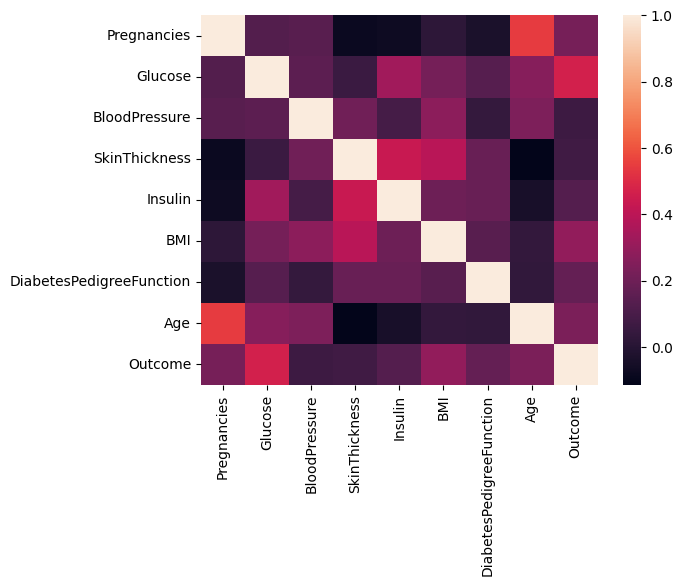

In [ ]:
sns.heatmap(Data.corr())

<Axes: >

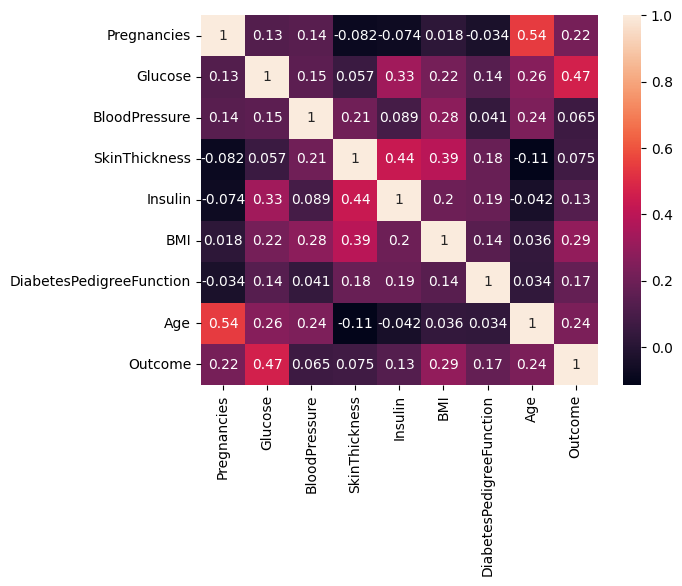

In [ ]:
sns.heatmap(Data.corr(),annot=True)

In [ ]:
# Feature Selection
X=Data.iloc[:,1:8] #1 to7
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [ ]:
Data.Outcome.values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:

y = Data.Outcome.values.reshape(-1,1) # 2 DIMENSION

In [ ]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=1)

the Gini index as a cost function used to evaluate splits in the dataset.

 It is calculated by subtracting the sum of the squared probabilities of each class from one.

In [ ]:
# to improve performance
# default=”gini”
DesTreClas = DecisionTreeClassifier(criterion ='gini',max_depth=4) # try 3
 # Quality of the split based on "gini" for the gini impurity
DesTreClas= DesTreClas.fit(X_train,y_train)
y_pred = DesTreClas.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7705627705627706


# Visualization

In [ ]:
from sklearn import tree

In [ ]:
text_representation = tree.export_text (DesTreClas)
print (text_representation)
#Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

|--- feature_0 <= 129.50
|   |--- feature_4 <= 26.30
|   |   |--- feature_4 <= 9.10
|   |   |   |--- feature_6 <= 28.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  28.00
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  9.10
|   |   |   |--- feature_5 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.67
|   |   |   |   |--- class: 0
|   |--- feature_4 >  26.30
|   |   |--- feature_6 <= 27.50
|   |   |   |--- feature_4 <= 45.40
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  45.40
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  27.50
|   |   |   |--- feature_5 <= 0.56
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.56
|   |   |   |   |--- class: 1
|--- feature_0 >  129.50
|   |--- feature_4 <= 27.85
|   |   |--- feature_0 <= 145.50
|   |   |   |--- feature_6 <= 59.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  59.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- f

In [ ]:
with open ("description_tree.log", "w") as fout:
    fout.write(text_representation)

# ## Plot Tree with plot_tree

This code uses the plot_tree() function from the scikit-learn library to plot a decision tree.

The DesTreClas parameter is the decision tree object that you want to plot.

The feature_names and class_names parameters are lists of the names of the features and classes in the data, respectively.

 The filled parameter specifies whether the nodes of the tree should be filled with color.


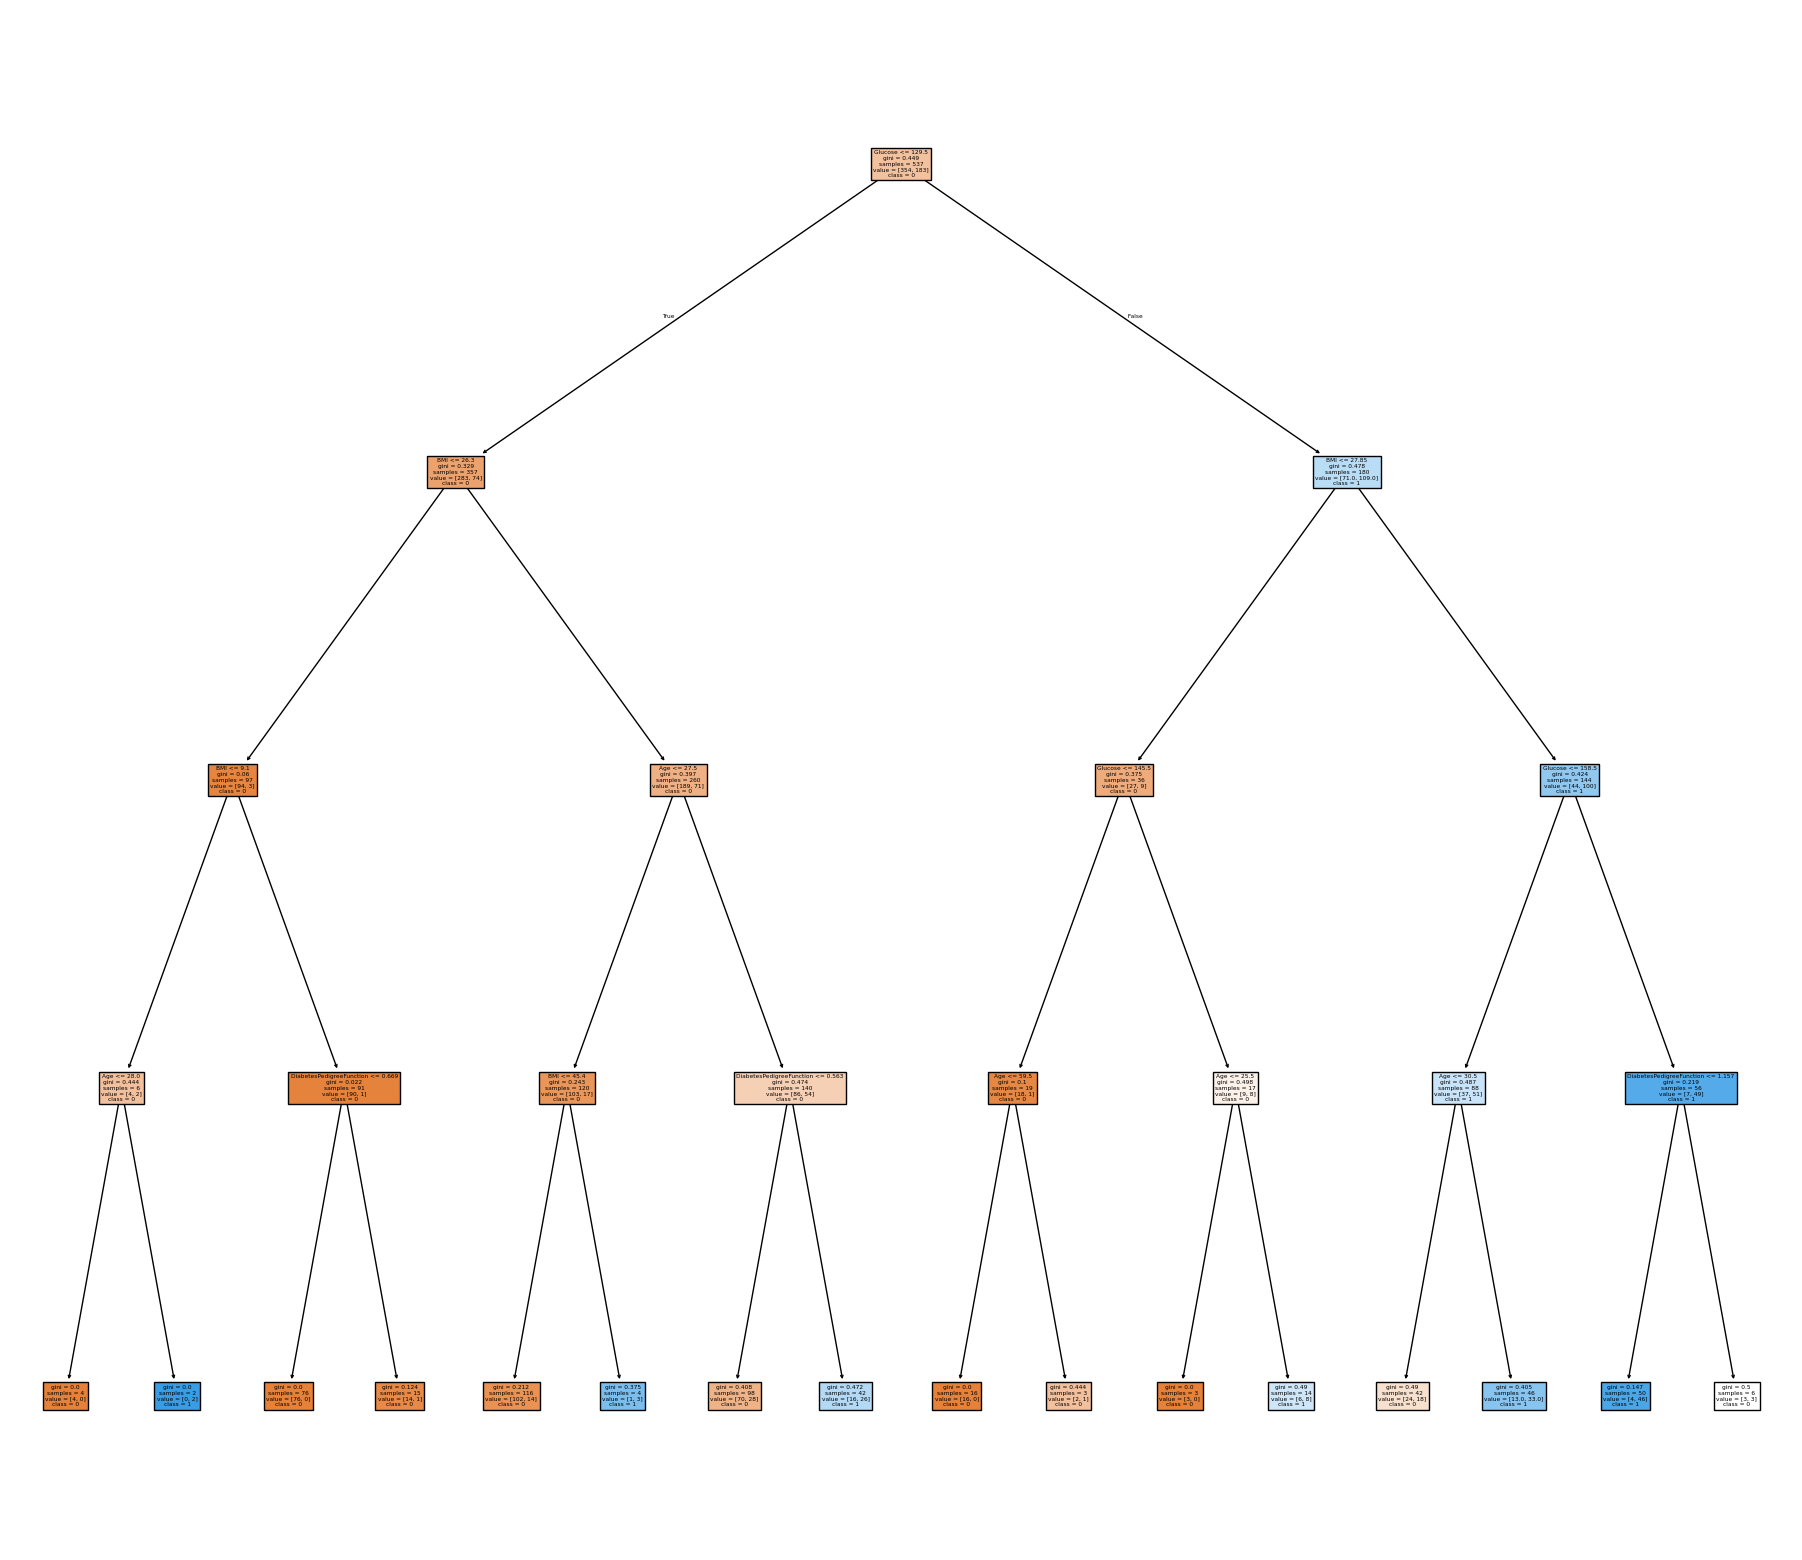

In [ ]:
feature_names = ['Glucose','BloodPressure','Skinthickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0', '1']
fig= plt.figure(figsize=(23,20))
Plot = tree.plot_tree(DesTreClas,
          feature_names= feature_names,
          class_names = target_names,
          filled = True)
fig.savefig('Tree1.png')

In [ ]:
DesTreClas = DecisionTreeClassifier(criterion ='entropy',max_depth=3)
## Quality of the split based on "entropy" for the information gain
DesTreClas= DesTreClas.fit(X_train,y_train)
y_pred = DesTreClas.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7705627705627706


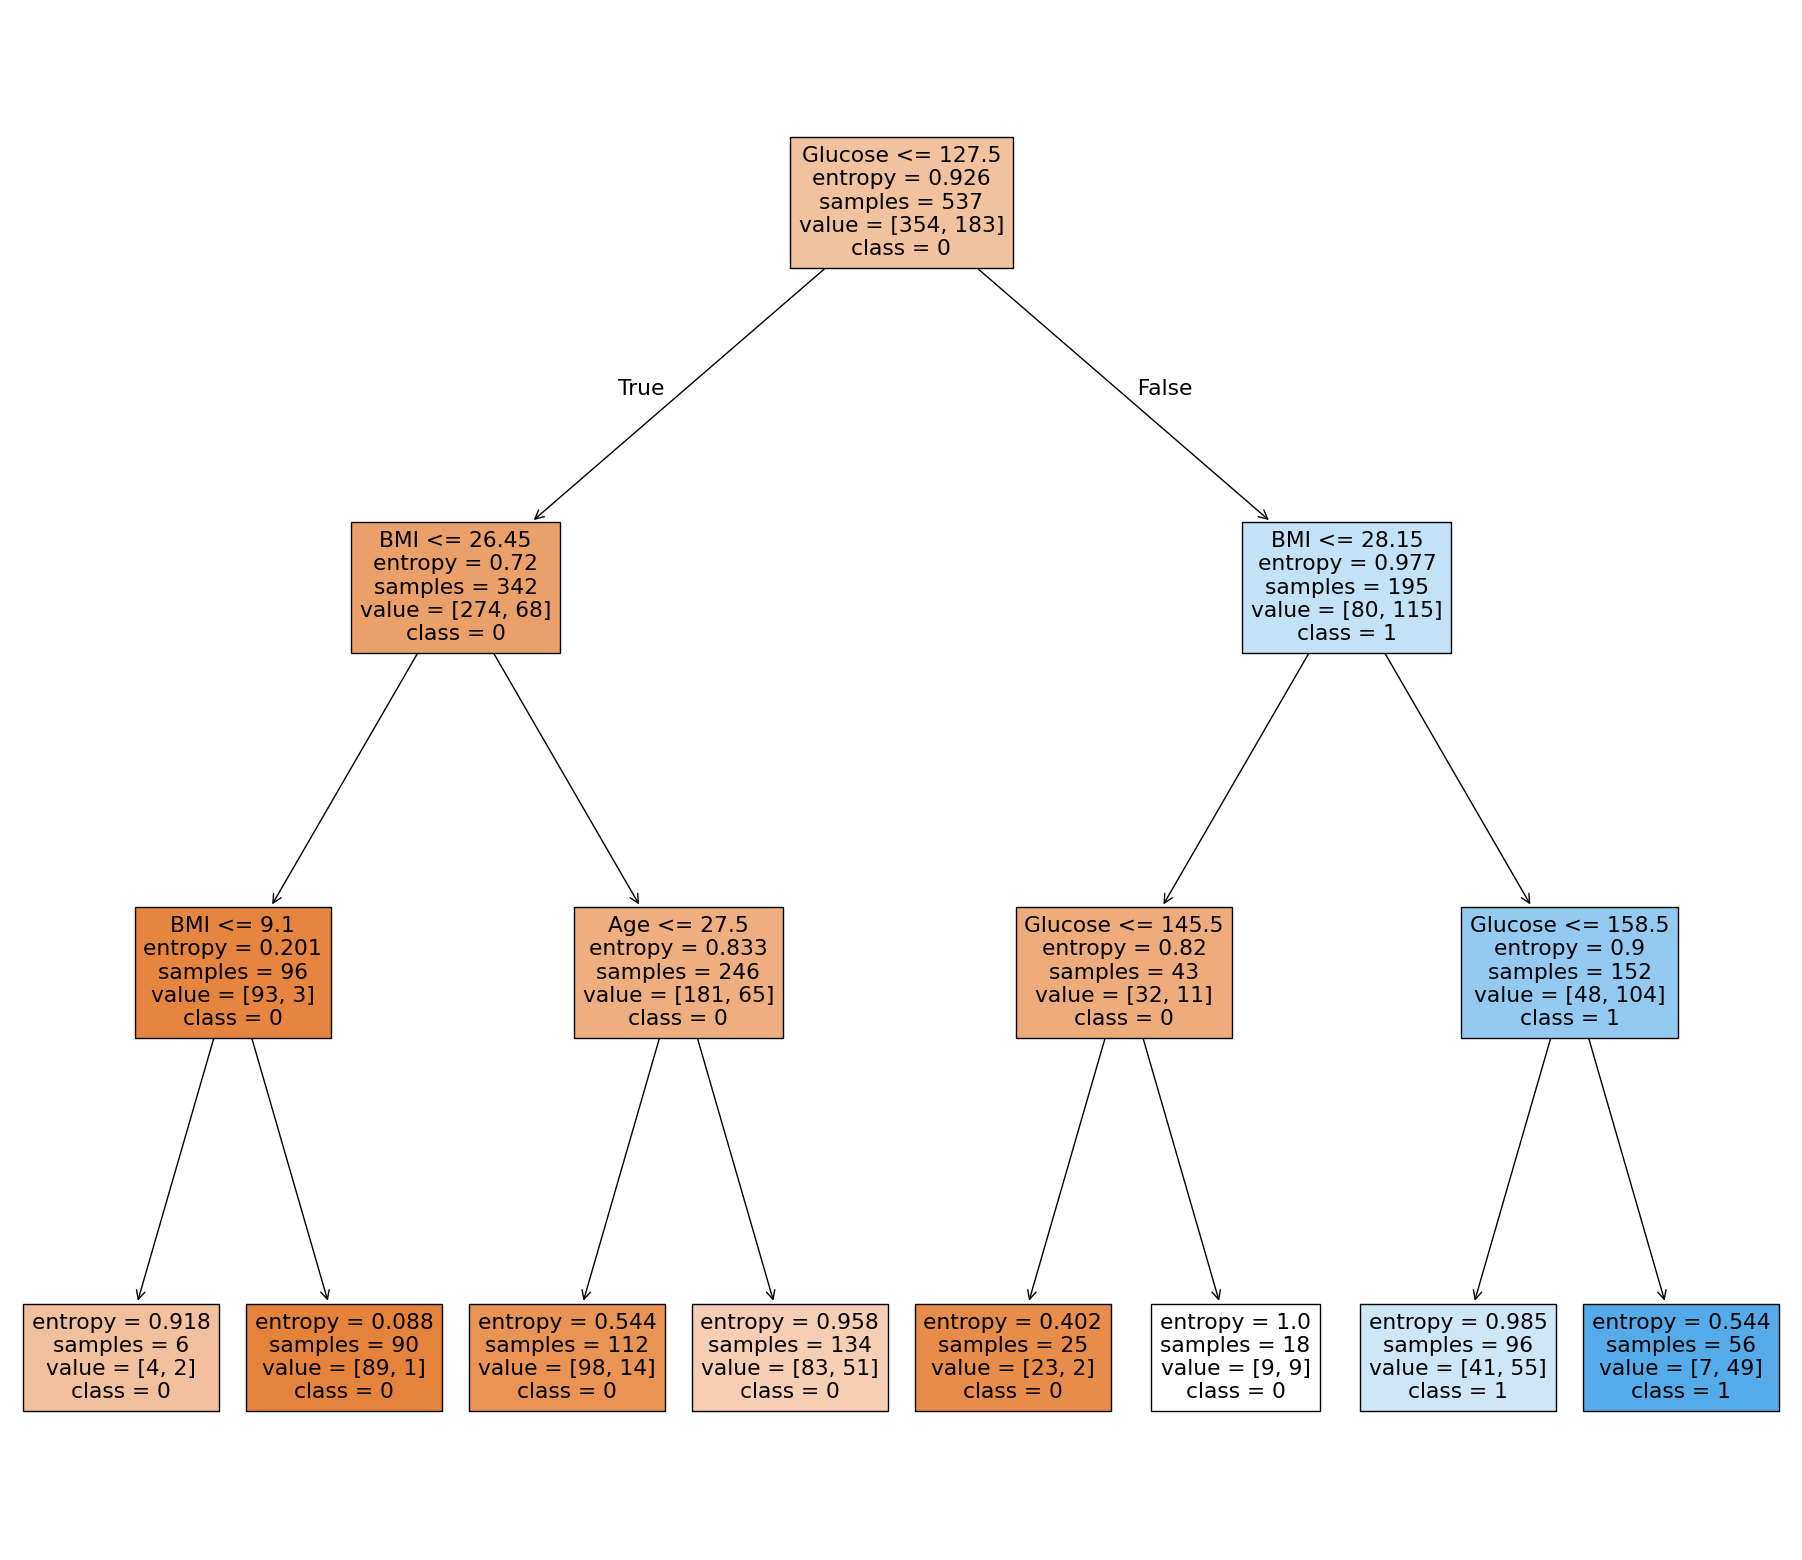

In [ ]:
feature_names = ['Glucose','BloodPressure','Skinthickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0', '1']
fig= plt.figure(figsize=(23,20))
Plot = tree.plot_tree(DesTreClas,
                      feature_names= feature_names,
                      class_names = target_names,
                      filled = True)
fig.savefig('Tree2.png')